Introduction
--
This dataset is sourced from the [2014 Behavioral Risk Factor Surveillance System](https://www.cdc.gov/brfss/annual_data/annual_2014.html) (BRFSS). The full dataset contains 464,644 entries and 279 features, and using [this CDC study](https://www.cdc.gov/pcd/issues/2019/19_0109.htm) as a reference, I selected 25 features to create a dataset with the goal of identifying risk factors for type-2 diabetes. The CDC study uses 27 features, but I found that two of these features contained duplicated measurements and, for now, have excluded them from this exploratory data analysis.

A couple of things about the data are worth mentioning before I get too far. First, the BRFSS does not make a distinction between diabetes types 1 and 2. In an effort to focus analysis on causes of type 2 diabetes, both the referenced CDC study and the data here limit respondants to those who are at least 30 years old, since type 1 diabetes typically develops earlier in life than type 2. While the BRFSS does ask respondants how old they were when diagnosed, many respondants were unable to answer the question. It is likely for this reason that the CDC study does not appear to use this information in any way. For now, I have chosen to do the same in order to avoid altering the data in ways that may not be appropriate.

Data exploration
--

In [1]:
# import libraries

import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
import numpy as np

# read in data
df_diabetes = pd.read_csv('2014_BRFSS_post_processing.csv')
df_diabetes.head()

,general_health,10yr_age_group,bmi_category,last_checkup,income,race,mscode,flushot,employed,sex,...,mental_health_days_per_month,kidney_disease,depressive_disorder,uses_medical_equipment,rent_or_own_home,any_exercise,blindness,trouble_concentrating,diabetes,smoker
0,5-Poor,60s,25-30 (Overweight),12 or fewer months,"$\$$50,001 - $\$$75,000",Multiracial,Not in an MSA,Yes,Unable to work,Female,...,1-5,Yes,No,Yes,Own,No,Yes,No,Yes,Former smoker
1,1-Excellent,50s,30+ (Obese),12 or fewer months,"$\$$50,001 - $\$$75,000",White,Inside a suburban county of the MSA,No,Employed for wages,Male,...,0,No,No,No,Own,Yes,No,No,No,Former smoker
2,3-Good,60s,30+ (Obese),12 or fewer months,"$\$$20,001 - $\$$25,000",White,Outside the center city of an MSA but inside t...,Yes,Retired,Female,...,0,No,No,No,Own,No,No,No,No,Never smoked
3,3-Good,80+,30+ (Obese),12 or fewer months,"$\$$35,001 - $\$$50,000",Black,Inside a suburban county of the MSA,Yes,Retired,Male,...,1-5,No,No,No,Own,Yes,No,No,Yes,Never smoked
4,2-Very good,60s,25-30 (Overweight),12 or fewer months,"$\$$75,000+",White,Inside a suburban county of the MSA,No,Retired,Male,...,0,No,No,No,Own,Yes,No,No,No,Former smoker


In [2]:
df_diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139266 entries, 0 to 139265
Data columns (total 25 columns):
 #   Column                         Non-Null Count   Dtype 
---  ------                         --------------   ----- 
 0   general_health                 139266 non-null  object
 1   10yr_age_group                 139266 non-null  object
 2   bmi_category                   139266 non-null  object
 3   last_checkup                   139266 non-null  object
 4   income                         139266 non-null  object
 5   race                           139266 non-null  object
 6   mscode                         139266 non-null  object
 7   flushot                        139266 non-null  object
 8   employed                       139266 non-null  object
 9   sex                            139266 non-null  object
 10  marital                        139266 non-null  object
 11  education                      139266 non-null  object
 12  sleep_time                     139266 non-nu

The target variable is column 23, which indicates whether a respondant has been diagnosed with diabetes. All of features are most readily understood as categorical variables, which will require me to do some additional research when I move on to the statistical analysis portion of this project. For now, the main thing to note is that my choices for visualization will be a bit limited. Still, bar graphs and histograms should help to expose some meaningful relationships in the data.

In [3]:
df_diabetes.shape

(139266, 25)

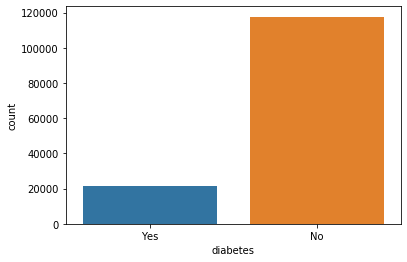

In [4]:
_ = sns.countplot(x='diabetes', data=df_diabetes)
plt.show()

In [5]:
df_diabetes['diabetes'].value_counts()

No     117679
Yes     21587
Name: diabetes, dtype: int64

Bearing in mind that the sample is limited to adults aged at least 30 years, about 15.5% of adults in this sample had been diagnosed with diabetes. In 2020, the CDC [reported](https://www.cdc.gov/diabetes/pdfs/data/statistics/national-diabetes-statistics-report.pdf) a diabetes rate of 10.5% for the general population (a rate of 13.0% was also reported for adults 18 and over).

In [6]:
df_positive = df_diabetes.loc[df_diabetes['diabetes'] == 'Yes']
df_negative = df_diabetes.loc[df_diabetes['diabetes'] == 'No']

def plot_column_as_percentage(column_name, rot=0, ha='center'):
    pos = df_positive[column_name].value_counts().sort_index()
    neg = df_negative[column_name].value_counts().sort_index()
    
    totals = totals = [i+j for i,j in zip(pos, neg)]
    pos_percent = [i/j * 100 for i,j in zip(pos, totals)]
    x_ticks = [i for i in range(len(pos.index))]
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))
    
    ax1.bar(x_ticks, pos_percent, color='#3274A1', width=.8)
    ax1.set_xticks(x_ticks)
    ax1.set_xticklabels(pos.index.to_numpy(), rotation=rot, ha=ha)
    ax1.set_title('Percent of people with diabetes, by {}'.format(column_name), fontsize=14)
    ax1.set_xlabel(column_name, fontsize=12, labelpad=8)
    ax1.set_ylabel('percentage with diabetes', fontsize=12, labelpad=8)
    
    pd.value_counts(df_diabetes[column_name]).sort_index().plot(ax=ax2, kind='bar', color='#3274A1', width=0.8)
    ax2.set_xticks(x_ticks)
    ax2.set_xticklabels(pos.index.to_numpy(), rotation=rot, ha=ha)
    ax2.set_title('Breakdown of {} in sample'.format(column_name), fontsize=14)
    ax2.set_xlabel(column_name, fontsize=12, labelpad=8)
    ax2.set_ylabel('sample count', fontsize=12, labelpad=8)
    plt.show()

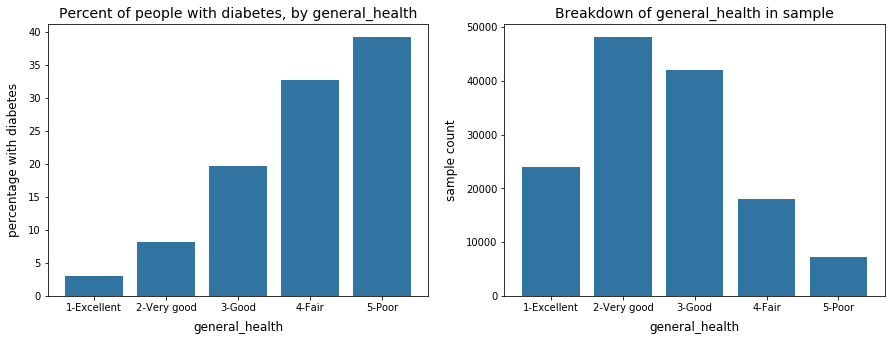

In [7]:
plot_column_as_percentage('general_health')

As we would expect, diabetes has a strong association with poor general health. The general health measurement is based on the subjective responses of survey participants, which probably explains the right skew of the breakdown of `general_health` -- if data on other health measurements like BMI are any indication, I might expect a more self-aware sample to have a left skew instead. In other words, it seems that people may tend to overestimate their own healthiness. Despite this, those who self-report excellent health are far less likely to report having diabetes than the average participant, and the reverse is true for those who self-report poor health, so `general_health` looks to be a strong predictor of whether a person has diabetes.

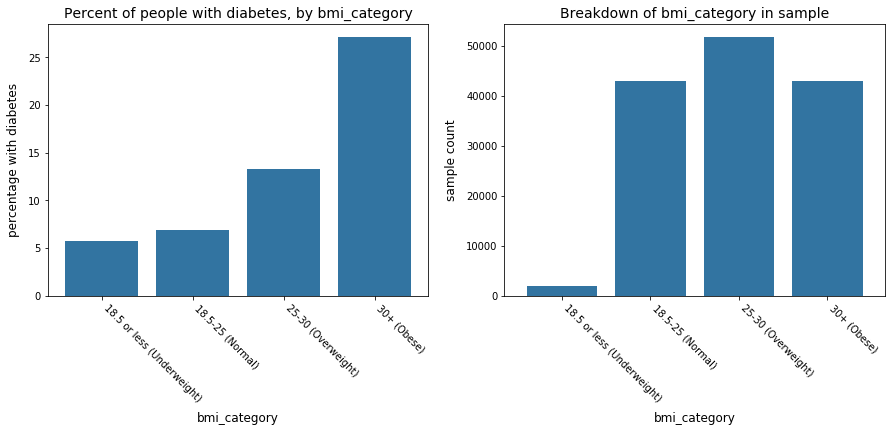

In [8]:
plot_column_as_percentage('bmi_category', -45, 'left')

The rate of diabetes increases non-linearly with BMI. Since most Americans are either overweight or obese, high BMI is likely one of the most prominent risk factors associated with diabetes and poor health outcomes in general, especially as BMI approaches the obese (30+) category.

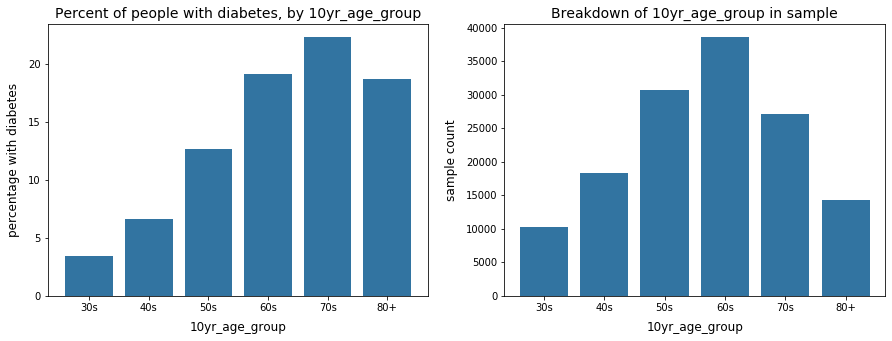

In [9]:
plot_column_as_percentage('10yr_age_group')

A person's risk of diabetes generally tends to increase with age, which is expected since health tends to decline as people get older. Interestingly, a lower risk of diabetes in found in those over 80 years old than those in their 70s, contrary to the pattern established in the rest of the graph. [The World Bank reports](https://data.worldbank.org/indicator/SP.DYN.LE00.IN?locations=US) reported an average life expectancy of 78.8 years in 2014 in the US; therefore, one possible reason for this change in the pattern is that those who live longer than expected have tended to maintain better health than those who do not.

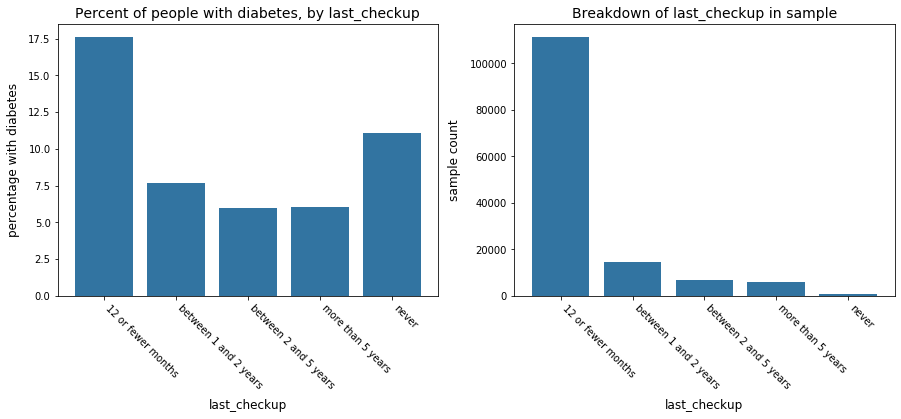

In [10]:
plot_column_as_percentage('last_checkup', -45, 'left')

I found the associations in the `last_checkup` feature to be rather surprising because I associate regular checkups with good health, yet the group that has had a checkup in the last 12 months has the highest rate of diabetes. Those who have never had a checkup were the next most likely to have been diagnosed with diabetes, but the rate of incidence is still below that of the whole sample. Perhaps those who consider themselves to be in good health are more likely to skip their regular checkups. It may also be worth noting that one has to actually visit a doctor in order to be diagnosed with diabetes.

----

The next four sets of bar graphs will be discussed as a group.

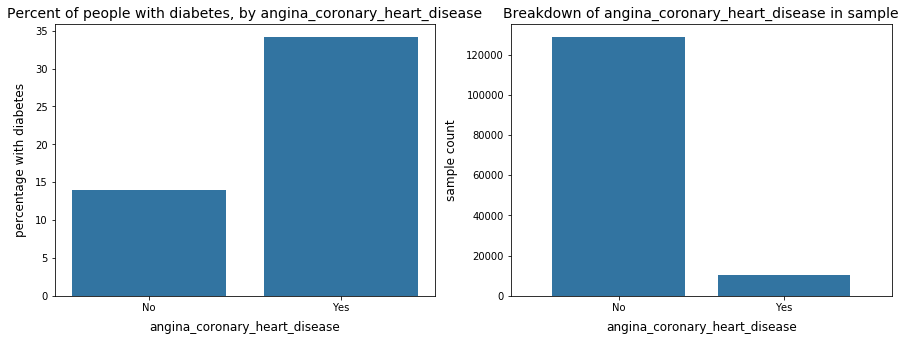

In [11]:
plot_column_as_percentage('angina_coronary_heart_disease')

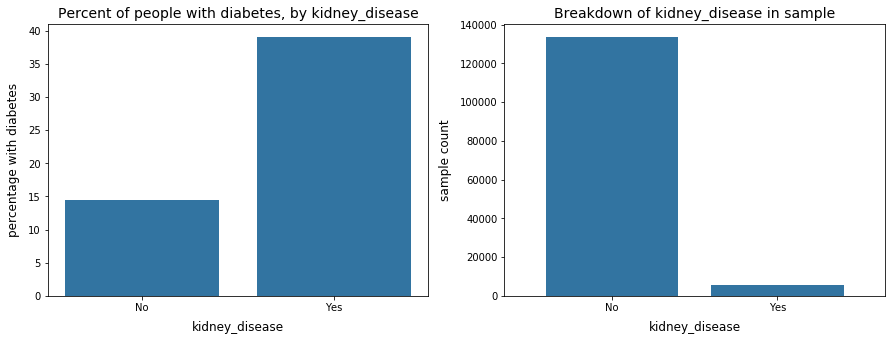

In [12]:
plot_column_as_percentage('kidney_disease')

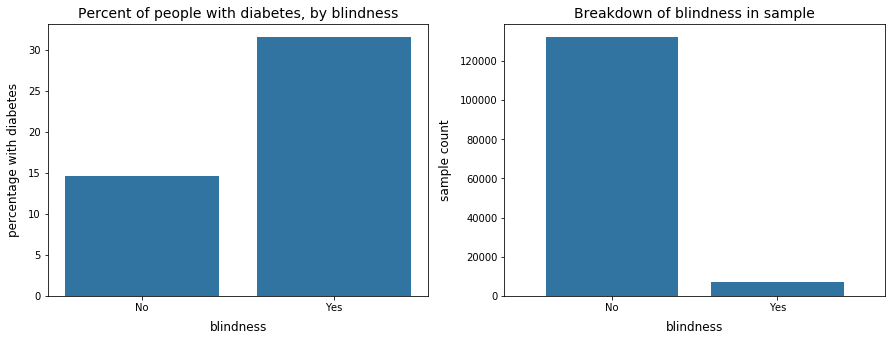

In [13]:
plot_column_as_percentage('blindness')

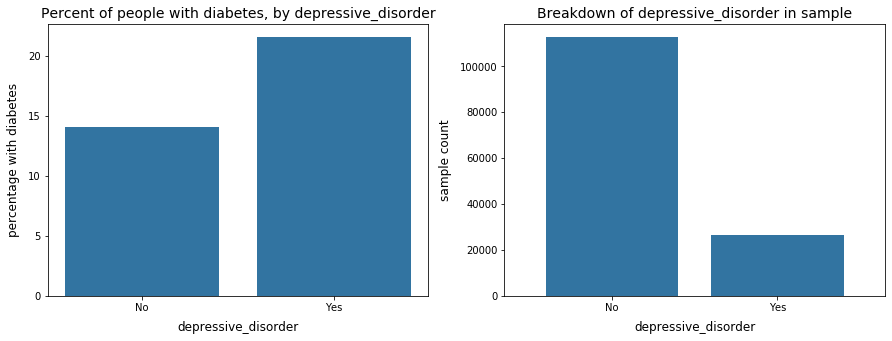

In [14]:
plot_column_as_percentage('depressive_disorder')

[According to the Mayo Clinic](https://www.mayoclinic.org/diseases-conditions/diabetes/symptoms-causes/syc-20371444), heart disease, kidney disease, blindness, and depression are all potential complications that can result from diabetes. While depression has many potential causes besides diabetes, the other conditions are rare enough that it seems fair to hypothesize that diabetes is a leading contributor to them.

----

The next three sets of bar graphs will be discussed as a group.

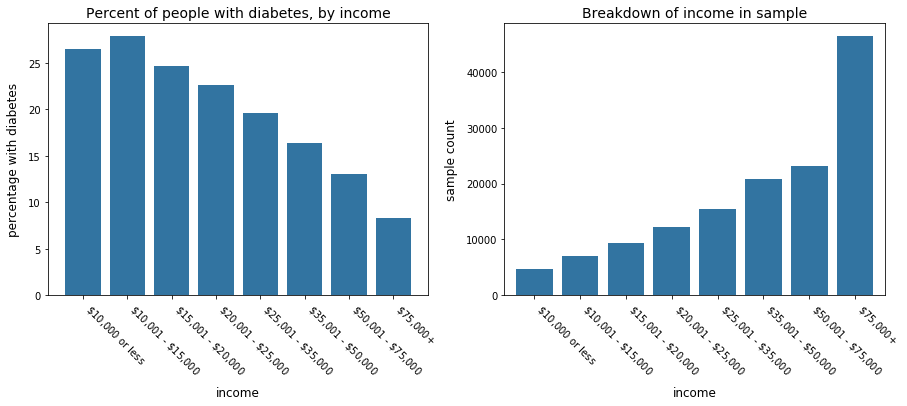

In [15]:
plot_column_as_percentage('income', -45, 'left')

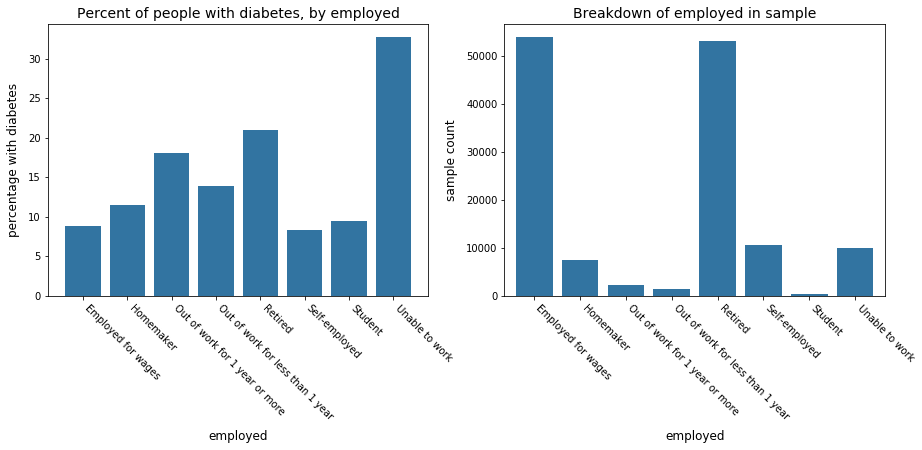

In [16]:
plot_column_as_percentage('employed', -45, 'left')

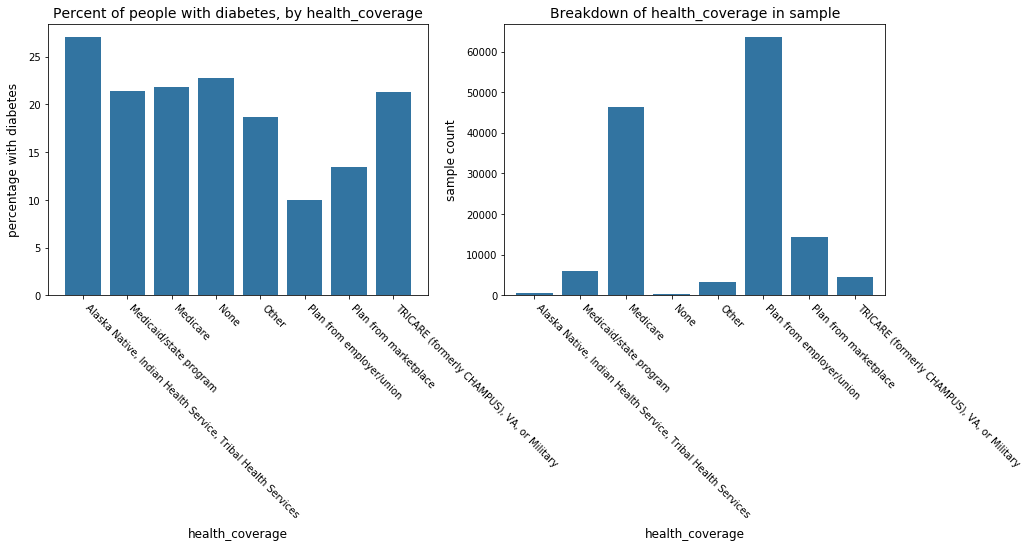

In [17]:
plot_column_as_percentage('health_coverage', -45, 'left')

Low income and unemployment are both strong indicators of a person's risk of diabetes. Although diabetes should be preventable before complications resulting in hospitalization begin to manifest, those who are less financially secure are less likely to have an adequet form of health insurance, which would make it more financially difficult to seek preventative care.

A person's age is likely also related to some of these risk factors, including those who are retired or those on Medicare. Those who use a health service for American Indians and Alaska natives are also at higher risk, though this may be indicative of factors that increase this group's risk other than the quality of care recieved.

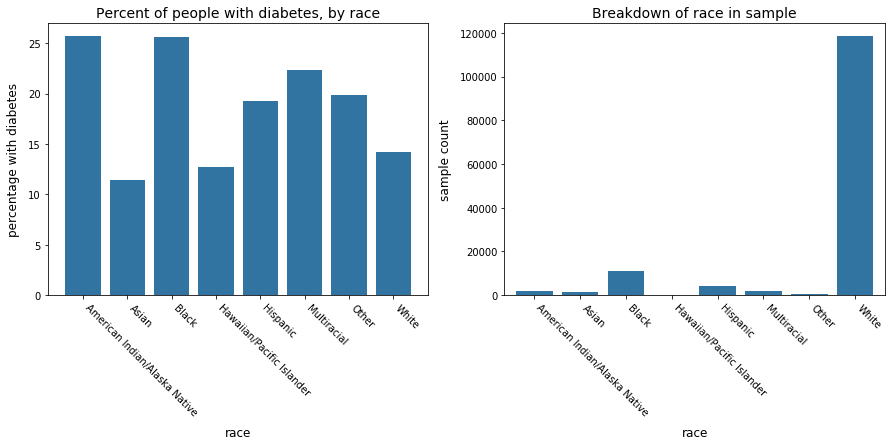

In [18]:
plot_column_as_percentage('race', -45, 'left')

As discussed above, American Indians and Alaska natives seem to be at particularly high risk of diabetes, as are black Americans. From these graphs alone, it is difficult to determine the reason for this higher observed risk. Whatever the cause may be, communicating that risk is likely still valuable to encourage people in these groups to consider seeking preventative care.

Conclusions
--

A number of factors including general heath measurements, lifestyle indicators, and demographic information have value as predictive features. However, most of the risk factors identified are associated with a diabetes rate of around 25% to 30%, so in order to construct an accurate predictive model, I expect we will need to be able to identify individuals with multiple risk factors.